In [53]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [78]:
def plotModelBoundary(x, X, y, Y, predict_callback):
    xx, yy = np.meshgrid(np.linspace(x, X, 100), np.linspace(y, Y, 100))
    yp = predict_callback(np.c_[np.ones(10000), xx.ravel(), yy.ravel()])
    yp = yp.reshape(xx.shape)
    plt.contour(xx, yy, yp, cmap=plt.cm.Paired)

In [2]:
x, y = make_moons(1000, noise=0.1)

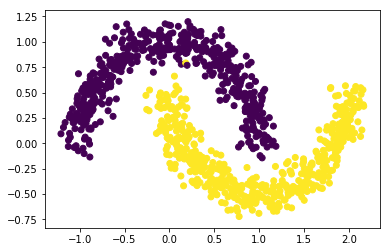

In [8]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [139]:
def prepare_data(x, y):
    n, _ = x.shape
    return np.c_[x**3, x**2, x, np.ones((n, 1))], y.reshape((-1, 1))

In [140]:
xx, yy = prepare_data(x, y)
xtrain, xtest, ytrain, ytest = train_test_split(xx, yy, test_size=0.2)

In [141]:
xx.shape

(1000, 7)

In [142]:
from datetime import datetime

In [158]:
def logistic_regression(xtrain, ytrain, xtest, ytest, batch_size = 100, n_epochs=2000, learning_rate=0.1):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    logdir = "{}/run-{}/".format(root_logdir, now)

    def get_batch(batch):
        return xtrain[batch * batch_size : (batch + 1) * batch_size], ytrain[batch * batch_size : (batch + 1) * batch_size]
    
    def predict_callback(xToPred):
        y_pred = prediction_sigmoids.eval(feed_dict={x: xToPred})
        return y_pred
    
    tf.reset_default_graph()
    
    n_batches = xtrain.shape[0] // batch_size    
    n, m = xtrain.shape

    x = tf.placeholder(tf.float32, shape=(None, xtrain.shape[1]), name='x')
    y = tf.placeholder(tf.float32, shape=(None, ytrain.shape[1]), name='y')
    
    w11 = tf.Variable(tf.random_uniform((m, 1), -1.0, 1.0), name='w11')    
    logits = tf.matmul(x, w11, name='output11')
    
    prediction_sigmoids = tf.sigmoid(logits, name='prediction_sigmoids')    
    loss = tf.reduce_mean(tf.losses.log_loss(y, prediction_sigmoids), name='loss')
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    optimize = optimizer.minimize(loss)
    
    init = tf.global_variables_initializer()
    
    summary = tf.summary.scalar('loss', loss)
    file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(n_epochs):
            for batch in range(n_batches):
                xb, yb = get_batch(batch)
                sess.run(optimize, feed_dict={x: xb, y: yb})
            loss_val, summary_str = sess.run([loss, summary], {x: xtest, y: ytest})
            saver.save(sess, './tf_logs/model.chckpt')
            file_writer.add_summary(summary_str, epoch)
            #print("Epoch: ", epoch, " loss: ", loss_val)
        
        y_predicted = prediction_sigmoids.eval(feed_dict={x: xtest})
        y_predicted_class = (y_predicted >= 0.5)
        print("Accuracy: ", accuracy_score(y_predicted_class, ytest))
        print("Precision: ", precision_score(y_predicted_class, ytest))
        #plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain)
        plt.scatter(xtest[:, 4], xtest[:, 5], c=y_predicted_class)
        file_writer.close()

Accuracy:  0.99
Precision:  0.979797979798


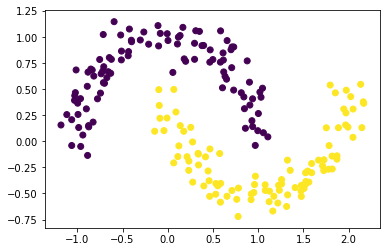

In [159]:
logistic_regression(xtrain, ytrain, xtest, ytest)